**IRIS FLOWER CLASSIFICATION USING ML**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

**Reading Data set**

In [ ]:
df=pd.read_csv('/content/iris.data')

In [ ]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**giving proper heading to my dataset**

In [ ]:
df_header = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
df.to_csv('Iris.csv', header = df_header, index = False)
df1= pd.read_csv('Iris.csv')

In [ ]:
df1

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df1.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


**no of rows and columns**

In [ ]:
df1.shape

(149, 5)

**checking null values in Dataset**

In [ ]:
df1.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

**Describing the Dataset**

In [ ]:
df1.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



**visualisation of dataset**

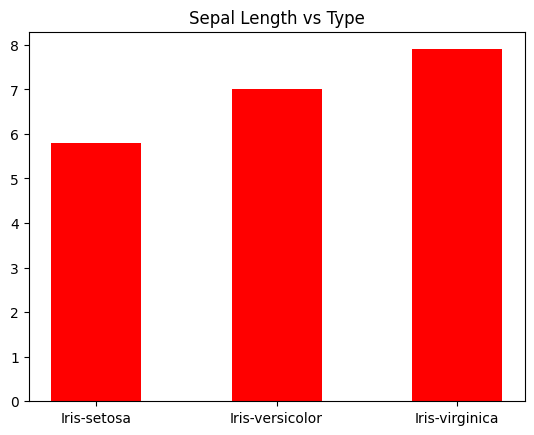

In [ ]:
plt.bar(df1['Species'],df1['SepalLength'], width = 0.5 , color='red') 
plt.title("Sepal Length vs Type")
plt.show()

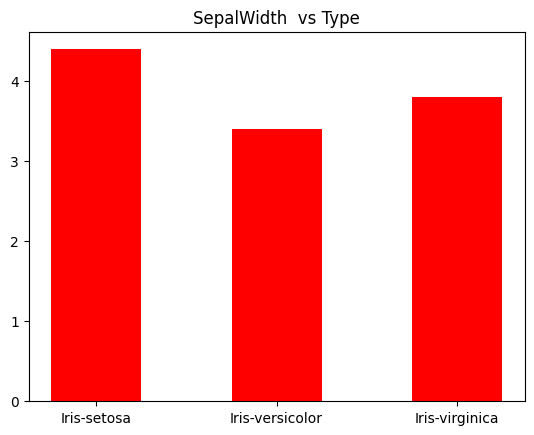

In [ ]:
plt.bar(df1['Species'],df1['SepalWidth'],width=0.5,color='red')
plt.title("SepalWidth  vs Type")
plt.show()

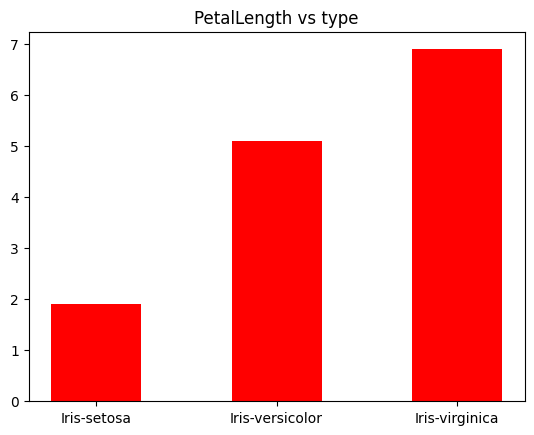

In [ ]:
plt.bar(df1['Species'],df1['PetalLength'],width=0.5,color='red')
plt.title("PetalLength vs type")
plt.show()

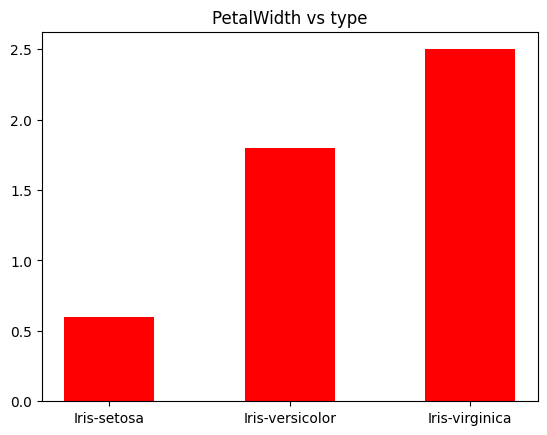

In [ ]:
plt.bar(df1['Species'],df1['PetalWidth'],width=0.5,color='red')
plt.title("PetalWidth vs type")
plt.show()

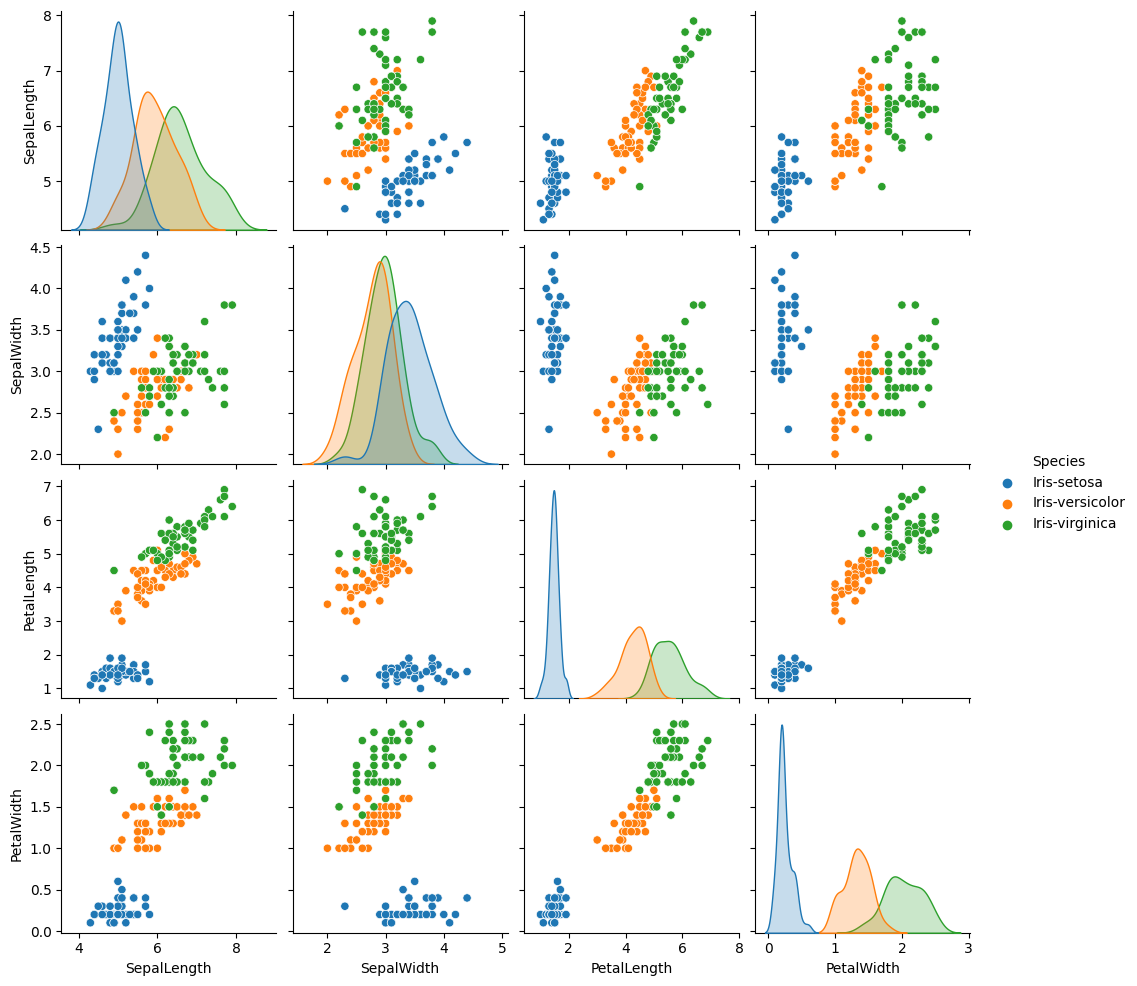

In [ ]:
sns.pairplot(df1,hue="Species")

<Axes: ylabel='PetalWidth'>

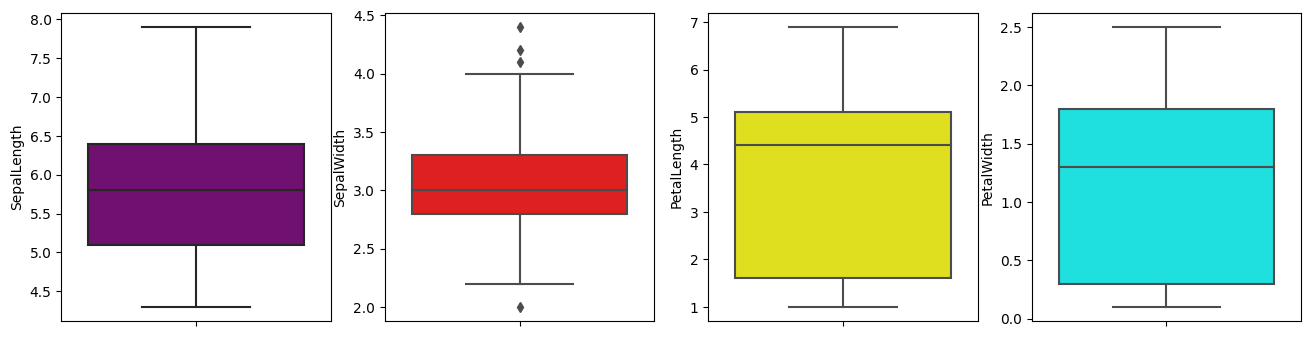

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df1,y='SepalLength',color='purple')
plt.subplot(1,4,2)
sns.boxplot(data=df1,y='SepalWidth',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=df1,y='PetalLength',color='yellow')
plt.subplot(1,4,4)
sns.boxplot(data=df1,y='PetalWidth',color='cyan')

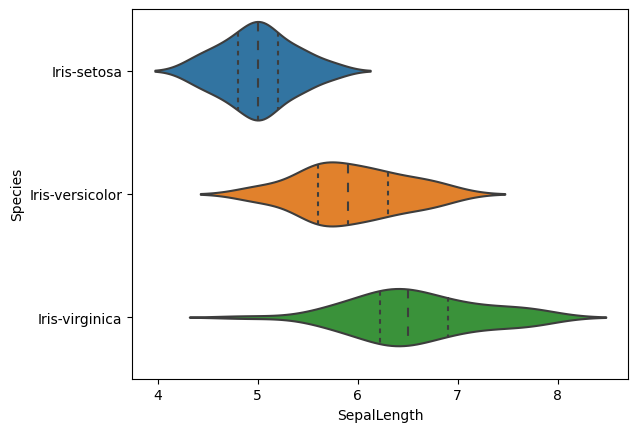

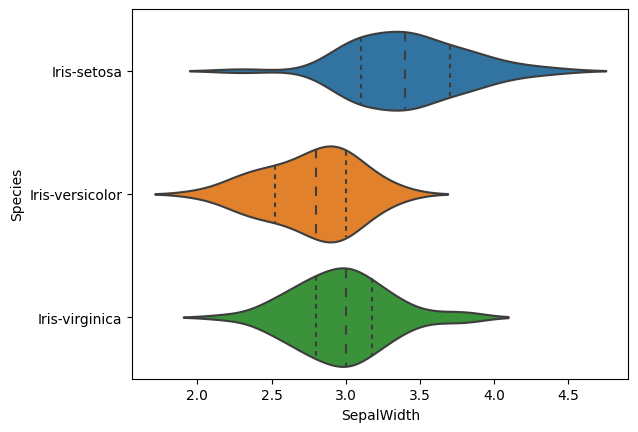

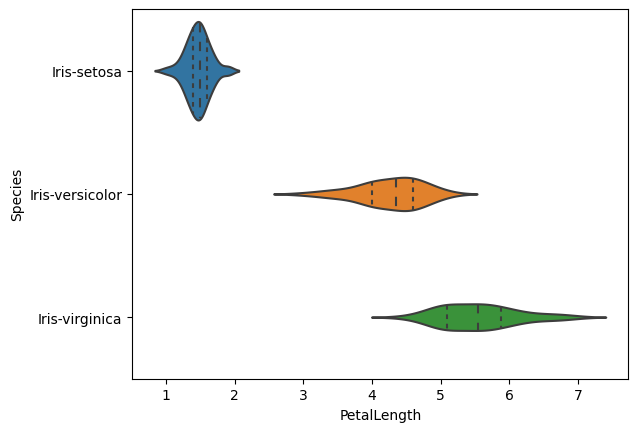

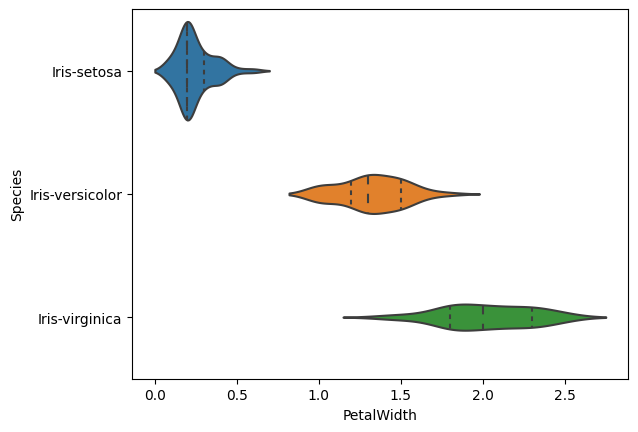

In [ ]:
sns.violinplot(y='Species', x='SepalLength', data=df1, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidth', data=df1, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLength', data=df1, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidth', data=df1, inner='quartile')
plt.show()

<ipython-input-24-67b056b61f73>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True,cmap='coolwarm')


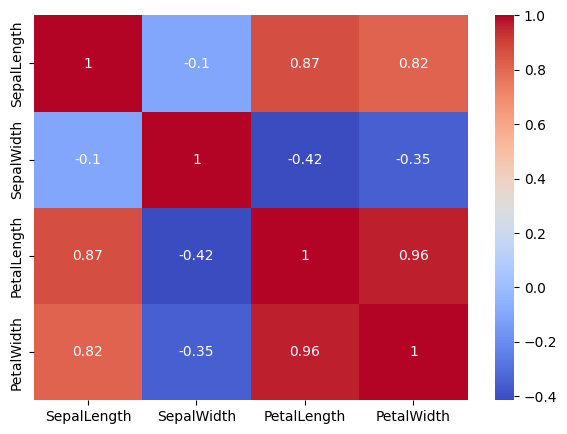

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(), annot=True,cmap='coolwarm')
plt.show()

**Building Model , Training and Testing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df1['Species'] = le.fit_transform = (df1['Species'])
df1.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split      #Machine learning Model used to classify the three flowers
X = df1.drop(columns=['Species'])
Y = df1['Species']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2)

**1.LOGISTIC REGRESSION**

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

In [ ]:

log_reg.fit(x_train,y_train)   #train our ML Model

LogisticRegression(max_iter=1000)

In [ ]:
log_reg.score(x_test,y_test)  #Checking Accuracy of the test dataset

0.9333333333333333

**2.KNN**

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=6)

In [ ]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
#Predict on the test set and calculate accuracy
y_pred=KNN.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print('KNN')
print(f'Accuracy: {round(score*100,2)}%')

KNN
Accuracy: 93.33%


**3.Decision Tree Classifier**

In [ ]:
DTC = DecisionTreeClassifier()

In [ ]:
DTC=DTC.fit(x_train,y_train)

In [ ]:
# Predict on the test set and calculate accuracy
y_pred=DTC.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [ ]:
print('Decision Tree Classifier')
print(f'Accuracy: {round(score*100,2)}%')

Decision Tree Classifier
Accuracy: 93.33%
